In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


https://arxiv.org/pdf/0810.2556.pdf

In [2]:
from astropy.io import fits

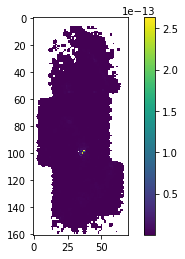

In [12]:
data=fits.getdata('./data/NGC3627_map_ha_corr_err.fits')
plt.imshow(data)
plt.colorbar()

In [13]:
data=np.nan_to_num(data)
Halpha_err_ = np.array(data).reshape(data.shape)

In [17]:
np.max(Halpha_err_), np.min(Halpha_err_)

(2.631422742515738e-13, 0.0)

In [18]:
np.quantile(Halpha_err_, [0.05, 0.95])

array([0.00000000e+00, 1.30300085e-15])

In [26]:
tmp = np.ravel(Halpha_err_)
indxs = tmp < 1.30300085e-15
tmp = tmp[indxs]

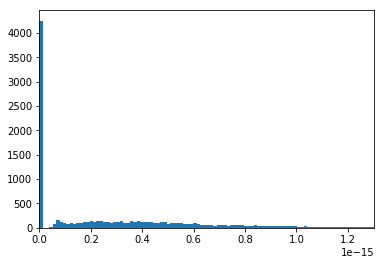

In [27]:
plt.hist(tmp, bins=100)
plt.xlim(0.00000000e+00, 1.30300085e-15)
plt.show()

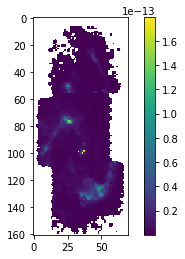

In [22]:
data=fits.getdata('./data/NGC3627_map_ha_corr.fits')
plt.imshow(data)
plt.colorbar()

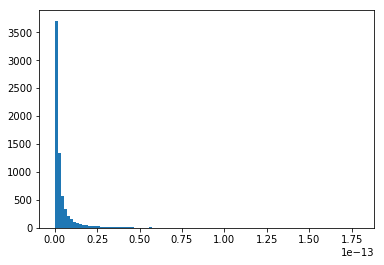

In [25]:
plt.hist(np.ravel(data), bins=100)
# plt.xlim(0.00000000e+00, 1.30300085e-15)
plt.show()

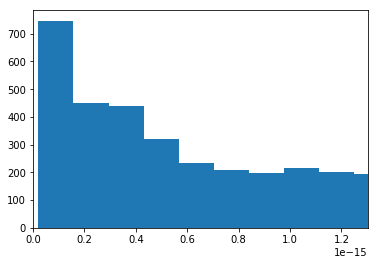

In [30]:
plt.hist(np.ravel(data)[indxs], bins=500)
plt.xlim(0.00000000e+00, 1.30300085e-15)
plt.show()

In [37]:
div = Halpha_err_/(data+0.00000000000000000000001)

In [38]:
np.max(div), np.min(div)

(2.6100359477800743, 0.0)

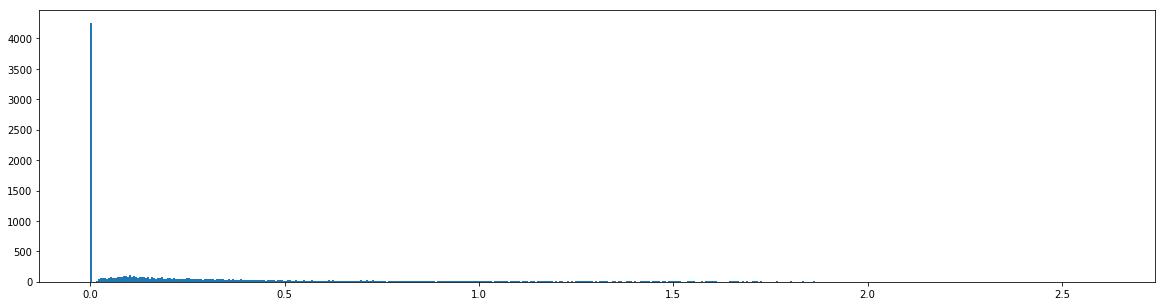

In [40]:
fig = plt.figure(figsize=[20,5])
plt.hist(np.ravel(div), bins=500)
# plt.xlim(0.00000000e+00, 1.30300085e-15)
plt.show()

In [41]:
np.median(div)

0.11728585641129581

In [42]:
np.median(div[div>0])

0.31487646769734345

In [43]:
np.min(Halpha_err_[Halpha_err_>0])

4.8920464876579665e-17

In [45]:
np.min(tmp[tmp>0])

4.8920464876579665e-17

In [46]:
Distance = 9.3

scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec
SFRerr = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * Halpha_err_

In [52]:
scale

0.04508767234318684

In [47]:
SFRerr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
SFRerr = SFRerr/(scale)**2

In [49]:
np.min(SFRerr[SFRerr>0])

0.0003131669807817324

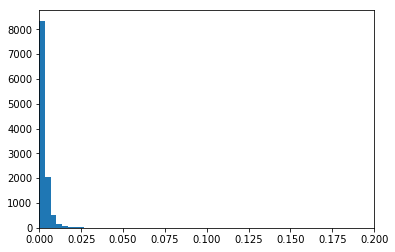

In [51]:
plt.hist(np.ravel(SFRerr), bins=500)
plt.xlim(0, 0.2)
plt.show()

In [53]:
SFR = 5.37 * 1000**2 * 4 * np.pi * (3.086 * 4.5)**2 * data
# SFR = SFR/(scale)**2

In [54]:
np.sum(SFR)

0.43300322267925284

In [62]:
np.mean(SFR), np.median(SFR)

(3.8420871577573455e-05, 4.517393796099525e-06)

In [55]:
0.03*np.pi*70*70*scale*scale

0.9388210922059143

In [57]:
Sigma_H2 = np.load('/mnt/sdb2/science/Course-work/NGC3627/data_1/Sigma_H2.npy')

In [58]:
Sigma_H2.shape

(156, 66)

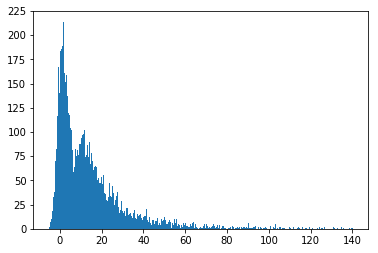

In [59]:
plt.hist(np.ravel(Sigma_H2), bins=500)
# plt.xlim(0, 0.2)
plt.show()

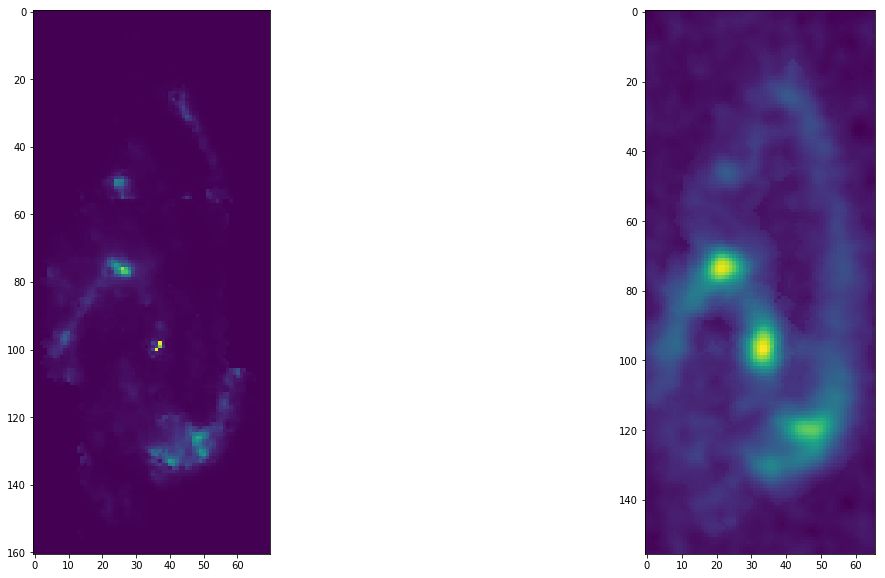

In [61]:
fig = plt.figure(figsize=[20,10])
ax = plt.subplot(121)
ax.imshow(SFR)

ax = plt.subplot(122)
ax.imshow(Sigma_H2)

plt.show()

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


ValueError: x and y must be the same size

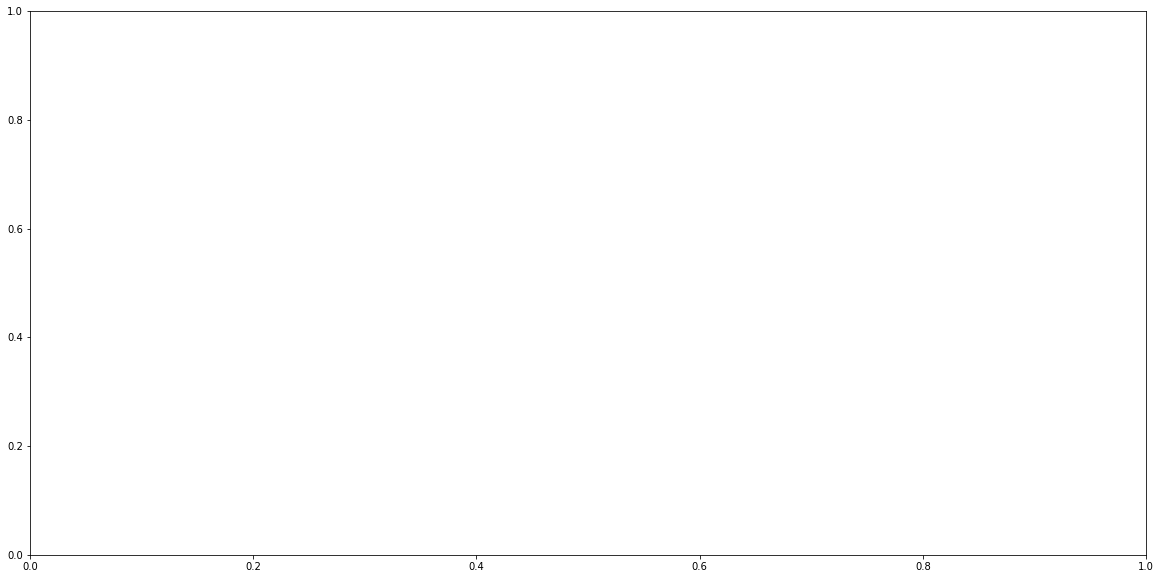

In [64]:
fig = plt.figure(figsize=[20,10])

# for sfr, h2 in zip(, ):
plt.scatter(np.log10(np.ravel(SFR)), np.log10(np.ravel(Sigma_H2)))
    
plt.show()

In [65]:
len(np.log10(np.ravel(SFR))), len(np.log10(np.ravel(Sigma_H2)))

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(11270, 10296)

In [66]:
SFR.shape,Sigma_H2.shape

((161, 70), (156, 66))

In [69]:
SFR[0:-34,0:-4].shape

(127, 66)

In [ ]:
np.save('./data/H_alpha.npy', H_alpha)

In [68]:
ppp = np.load('/mnt/sdb2/science/Course-work/NGC3627/data/H_alpha.npy')
ppp.shape

(156, 66)

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


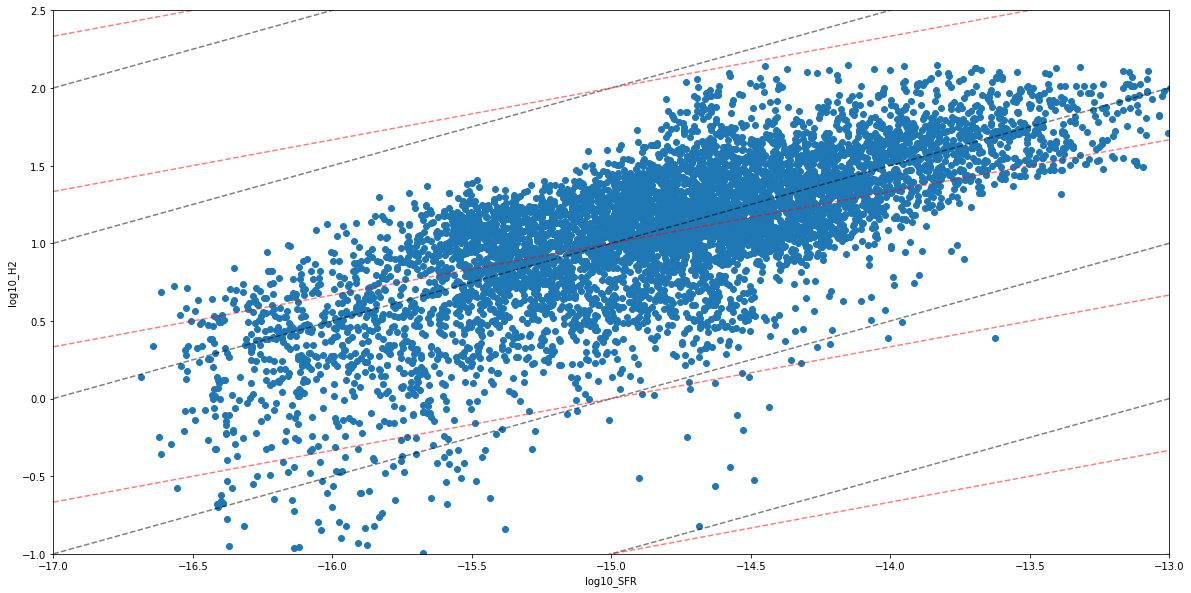

In [85]:
fig = plt.figure(figsize=[20,10])

# for sfr, h2 in zip(, ):
plt.scatter(np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2)))

# plt.contourf(np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2)))

N = 2.
for offs in np.arange(-100.5, 100.5, 1):
    plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='k')
    
N = 3.
for offs in range(-100, 100, 1):
    plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='r')

plt.xlabel('log10_SFR')
plt.ylabel('log10_H2')
plt.ylim(-1,2.5)
plt.xlim(-17,-13)
plt.show()

In [77]:
import matplotlib.colors as colors
from matplotlib import path
# import numpy as np
# from matplotlib import pyplot as plt
try:
    from astropy.convolution import Gaussian2DKernel, convolve
    astro_smooth = True
except ImportError as IE:
    astro_smooth = False

In [78]:
astro_smooth

True

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


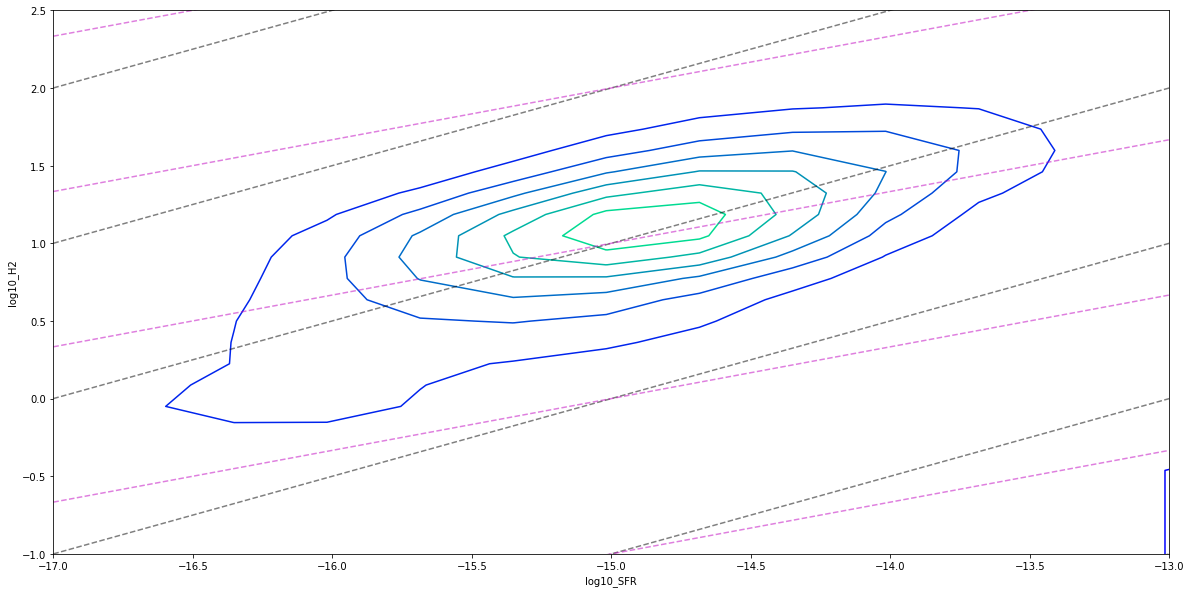

In [105]:
fig = plt.figure(figsize=[20,10])

x,y = np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2))

x=np.nan_to_num(x)
y=np.nan_to_num(y)


H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(stddev=1.)
    H=convolve(H,kernel)

ax = plt.subplot(111)
clevels = ax.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)

# # Identify points within contours
# p = clevels.collections[0].get_paths()
# inside = np.full_like(x,False,dtype=bool)
# for level in p:
#     inside |= level.contains_points(zip(*(x,y)))

# ax.plot(x[~inside],y[~inside],'kx')


# plt.scatter(np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2)), 1., color='r')

# plt.contourf(np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2)))

N = 2.
for offs in np.arange(-100.5, 100.5, 1):
    plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='k')
    
N = 3.
for offs in range(-100, 100, 1):
    plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='m')

plt.xlabel('log10_SFR')
plt.ylabel('log10_H2')
plt.ylim(-1,2.5)
plt.xlim(-17,-13)


plt.show(block=False)

In [110]:
from scipy import stats

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


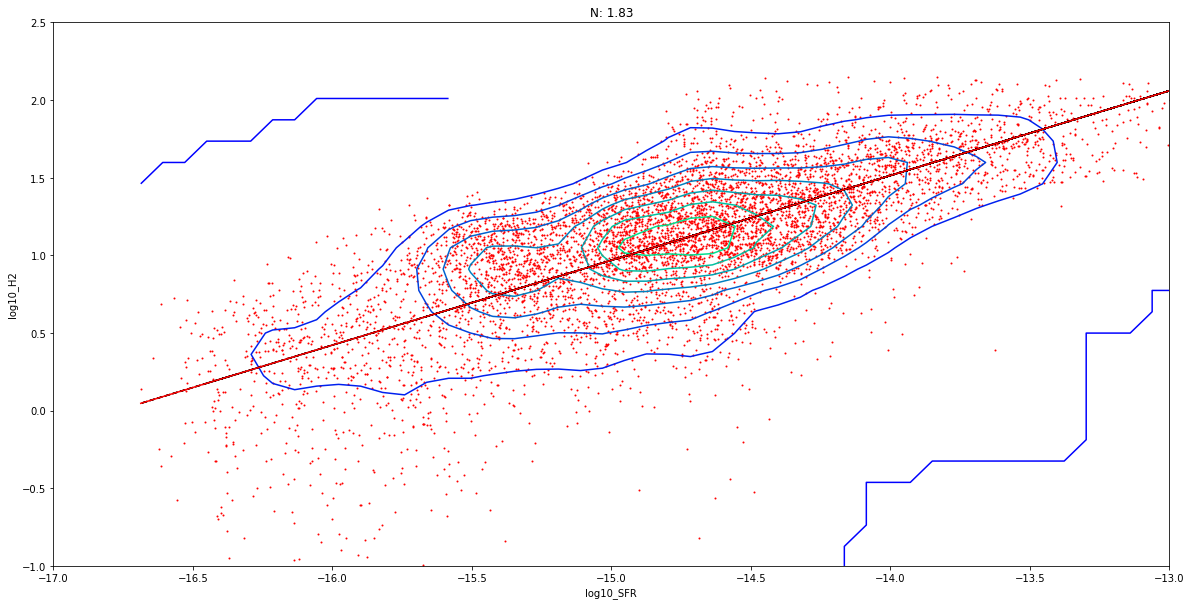

In [117]:
fig = plt.figure(figsize=[20,10])

indxs = (ppp>0) & (Sigma_H2>0)

x,y = np.log10(np.ravel(ppp[indxs])), np.log10(np.ravel(Sigma_H2[indxs]))

x=np.nan_to_num(x)
y=np.nan_to_num(y)


H, xedges, yedges = np.histogram2d(x,y, bins=(50,40))
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(stddev=1.)
    H=convolve(H,kernel)

ax = plt.subplot(111)
clevels = ax.contour(xmesh,ymesh,H.T,lw=.9,cmap='winter')#,zorder=90)

# # Identify points within contours
# p = clevels.collections[0].get_paths()
# inside = np.full_like(x,False,dtype=bool)
# for level in p:
#     inside |= level.contains_points(zip(*(x,y)))

# ax.plot(x[~inside],y[~inside],'kx')


plt.scatter(x,y, 1., color='r')

# plt.contourf(np.log10(np.ravel(ppp)), np.log10(np.ravel(Sigma_H2)))

# N = 2.
# for offs in np.arange(-100.5, 100.5, 1):
#     plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='k')
    
# N = 3.
# for offs in range(-100, 100, 1):
#     plt.plot([-17, -13], [-17./N+offs, -13./N+offs], '--', alpha=0.5, color='m')


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x, poly1d_fn(x), '--k')

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x1,y1,'-r')


plt.xlabel('log10_SFR')
plt.ylabel('log10_H2')
plt.ylim(-1,2.5)
plt.xlim(-17,-13)

plt.title('N: {:2.2f}'.format(1./gradient))


plt.show(block=False)

In [132]:
nn = []
points = []

for plim in np.arange(-17., -13., 0.05):

    indxs = (ppp>0) & (Sigma_H2>0) & (np.log10(ppp) > plim)

    x,y = np.log10(np.ravel(ppp[indxs])), np.log10(np.ravel(Sigma_H2[indxs]))

    x=np.nan_to_num(x)
    y=np.nan_to_num(y)




    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    nn.append(1./gradient)
    points.append(len(x))
    

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [133]:
len(nn)

80

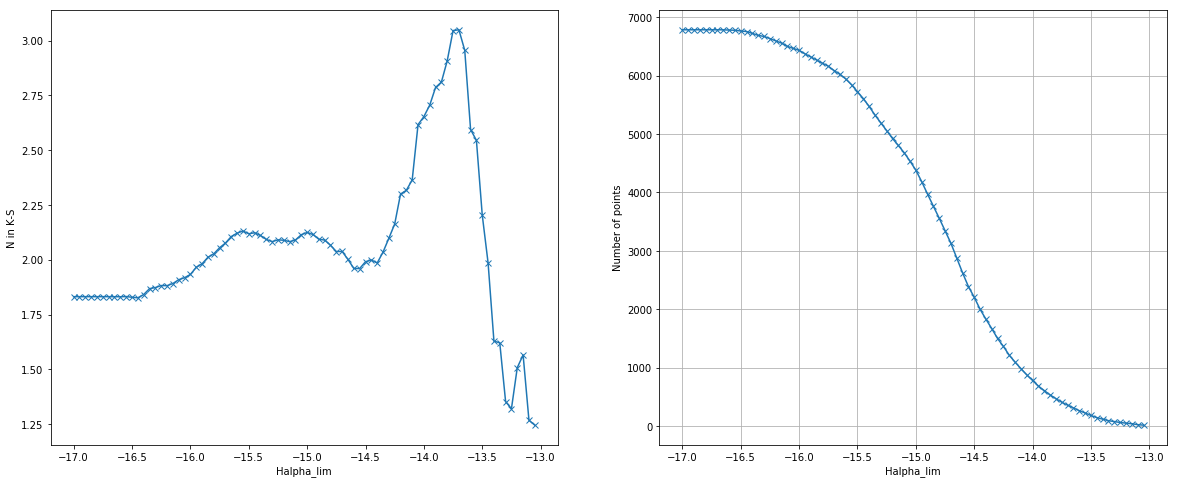

In [135]:
fig = plt.figure(figsize=[20,8])

ax = plt.subplot(121)

plt.plot(np.arange(-17., -13., 0.05), nn, 'x-')
plt.xlabel('Halpha_lim')
plt.ylabel('N in K-S')

ax = plt.subplot(122)

plt.plot(np.arange(-17., -13., 0.05), points, 'x-')
plt.xlabel('Halpha_lim')
plt.ylabel('Number of points')
plt.grid()

plt.show()